In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import kaggle

from pycaret.regression import *

In [2]:
data = "../data/"

In [3]:
# download Possum dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('nikhil7280/student-performance-multiple-linear-regression', path=data, unzip=True)

In [19]:
# read the data
df = pd.read_csv(data + 'Student_Performance.csv')
# view the data
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


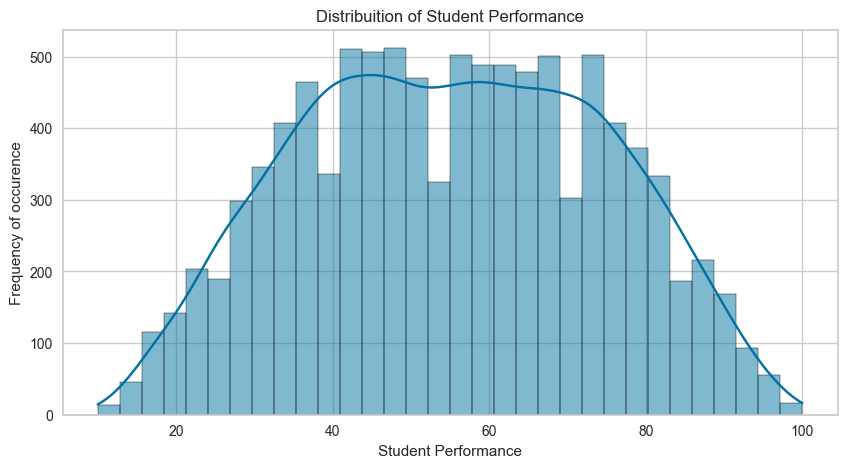

In [6]:
# visualize a distribution of Student Performance
plt.figure( figsize=(10, 5))
sns.histplot(df['Performance Index'], kde=True)
plt.title('Distribuition of Student Performance')
plt.ylabel('Frequency of occurence')
plt.xlabel('Student Performance')
plt.show()

In [17]:
df['StudyvSleep'] = df['Hours Studied'] / df['Sleep Hours']
# df['StudyvPractice'] = df['Hours Studied'] / df['Sample Question Papers Practiced']

In [20]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(include ='number').nunique()
print(cardinality.sort_values())

Sleep Hours                          6
Hours Studied                        9
Sample Question Papers Practiced    10
Previous Scores                     60
Performance Index                   91
dtype: int64


In [21]:
# Assign target to variable
target = 'Performance Index'

# Identify categorical features
cat_features = ['Extracurricular Activities']

# view categorical features
cat_features

['Extracurricular Activities']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [23]:
experiment = setup(data=df, target= target, categorical_features = cat_features,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,Performance Index
2,Target type,Regression
3,Original data shape,"(10000, 6)"
4,Transformed data shape,"(10000, 6)"
5,Transformed train set shape,"(7000, 6)"
6,Transformed test set shape,"(3000, 6)"
7,Ordinal features,1
8,Numeric features,4
9,Categorical features,1


In [24]:
# get the best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.6229,4.1664,2.0405,0.9887,0.0468,0.0350,0.6550
ridge,Ridge Regression,1.6229,4.1664,2.0405,0.9887,0.0468,0.0350,0.0270
lar,Least Angle Regression,1.6229,4.1664,2.0405,0.9887,0.0468,0.0350,0.0270
br,Bayesian Ridge,1.6229,4.1664,2.0405,0.9887,0.0468,0.0350,0.0280
huber,Huber Regressor,1.6231,4.1677,2.0408,0.9887,0.0468,0.0350,0.0570
gbr,Gradient Boosting Regressor,1.6870,4.5095,2.1227,0.9878,0.0489,0.0364,0.1680
lightgbm,Light Gradient Boosting Machine,1.6918,4.5468,2.1316,0.9877,0.0492,0.0365,0.3140
llar,Lasso Least Angle Regression,1.7537,4.8762,2.2068,0.9868,0.0511,0.0381,0.0270
lasso,Lasso Regression,1.7537,4.8762,2.2068,0.9868,0.0511,0.0381,0.0270
en,Elastic Net,1.7612,4.9189,2.2163,0.9867,0.0517,0.0384,0.0270


In [25]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

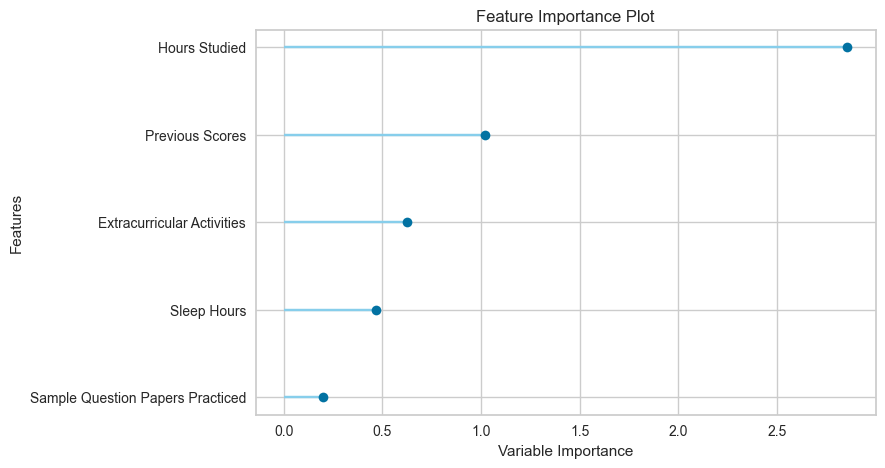

In [26]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [27]:
# save model
save_model(best_model, 'my_Possum_age_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Hours Studied', 'Previous Scores',
                                              'Sleep Hours',
                                              'Sample Question Papers '
                                              'Practiced'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Extracurricular Activities'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_en...
                  TransformerWrapper(include=['Extracurricular Activities'],
                                     transformer=OrdinalEncoder(cols=['Extracurricular '
                                                                      'Activities'],
                                                                handle_missing='retu